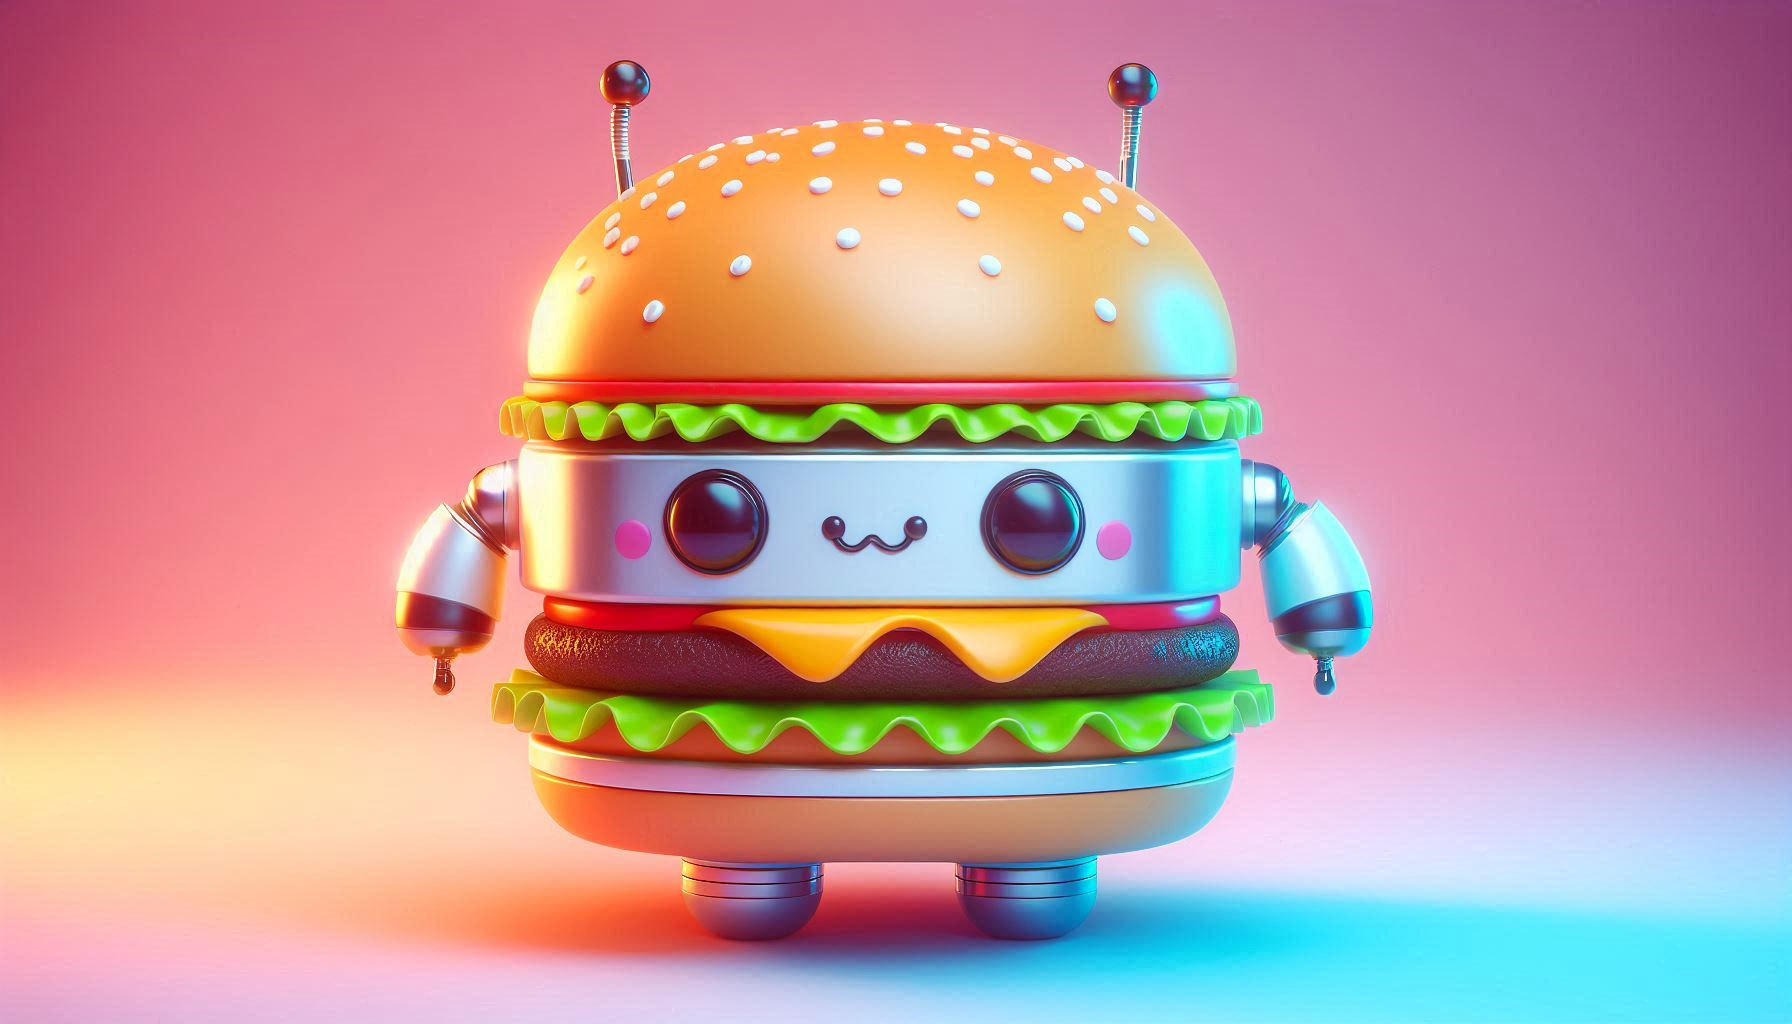

# **Transforming Food Ordering with Next-Gen AI Chatbots!**

### **Problem Statement:**

Traditional food order chatbots often fail to deliver a personalized and engaging experience, leaving customers unsatisfied. These limitations manifest as repetitive interactions, a lack of context awareness, and difficulty understanding user queries. This frustration translates to lost business and a negative brand perception. Existing online ordering systems, while offering some convenience, often lack the ability to cater to specific dietary needs or preferences. This inflexibility hinders personalization and limits customer satisfaction. There's a pressing need for a cutting-edge solution that can address these shortcomings. We require a system that understands and responds to user queries in real-time, offering dynamic and creative interactions.

### **Solution:**

**Bun Buddy - A Generative AI Chatbot for Burger Shop:**

Bun Buddy aims to address the limitations of current burger ordering methods by leveraging the power of Generative AI technology.

Here's how Bun Buddy will revolutionize the ordering experience:

•	**Personalized Interactions:** Bun Buddy will engage in friendly and natural conversations, understanding individual needs and preferences. Customers can customize their burgers precisely, catering to dietary restrictions or unique tastes.


•	**Real-Time Response & Context Awareness:** Bun Buddy will understand the flow of the conversation and respond accordingly, eliminating repetitive interactions and frustrations.

•	**Enhanced Efficiency:** The user-friendly interface will streamline the ordering process, leading to faster order placement and reduced wait times.

•**Reduced Errors:** Eliminating human intervention minimizes the risk of order errors, ensuring customer satisfaction.

By implementing Bun Buddy, Burger Shop can expect several benefits:

•	**Improved Customer Satisfaction:** Personalized interactions and a user-friendly experience will lead to happier customers.

•**Increased Order Accuracy:** Eliminating human error guarantees accurate orders.

•	**Streamlined Operations:** Faster order processing leads to increased efficiency and potentially higher sales volume.


## **Bun Buddy ChatBot:**

#### Let's create a burger ordering chatbot using Gradio and Gemini Pro.

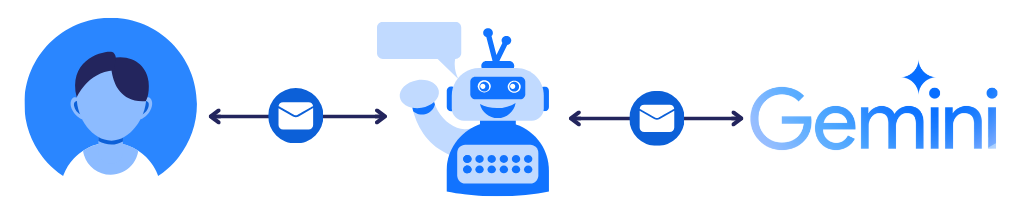

####**Step 1:**
Import and install the necessary libraries

In [ ]:
!pip install gradio
!pip install google-generativeai

import google.generativeai as genai
import gradio as gr

####**Step 2:**

* Configure teh Gemini API Key.
* Initializing the model using genai.
* Initializing the chat using model.

In [ ]:
# Configure api_key
genai.configure(api_key="YOUR_GEMINI_API_KEY")

# Define Model Instance
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])

#### **Step 3:**

Create a function to send the query to the LLM and get the response in return.

In [ ]:
# Define function, which helps to execute any prompt
def get_llm_response(message):
    response = chat.send_message(message)
    print(response)
    return response.text

#### **Step 4:**

1. Define the Basic Information for the Bot



In [ ]:
base_info = """
You are OrderBot, an automated service to collect orders for a Burger Singh Restaurant. \
You first greet the customer, then collects the order, \
and then asks if its a pickup or delivery. \
Please do not use your own knowladge, stick within the given context only. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else.
"""

2. Define Delivery related instructions

In [ ]:
delivery_info = """If its a delivery, you ask for an address. \
Finally you collect the payment. \
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu. \
You respond in a short, very conversational friendly style. \
The menu includes"""

3. Define the Menu

In [ ]:
# Define available burger types
burger_type = """
Desi burger for 79 Rs \
Maharaja burger for 179 Rs \
Aloo Tikki burger for 99 Rs \
Classic Cheese burger for 129 Rs \
Double Cheese burger for 179 Rs \
Heartattack burger for 1249 Rs \
"""

In [ ]:
# Define available fries
fries = "45 Rs 60 Rs 80 Rs"

In [ ]:
# Define available toppings
toppings = """
lettuce 15 Rs  \
tomato 15 Rs  \
onion 15 Rs  \
pickles 15 Rs  \
mushrooms 15 Rs  \
extra cheese 20 Rs  \
Tandoori sauce 15 Rs  \
peppers 10 Rs
"""

In [ ]:
# define drinks
drinks = """
coke 60 Rs, 45 Rs, 30 Rs \
sprite 60 Rs, 45 Rs, 30 Rs \
bottled water 50 Rs \
dolly special chai 99 Rs \
"""

#### **Step 5**

* Create the Final Prompt
* Create Welcome Message
* Define Communication Function
* Create Gradio Instance
* Launch Gradio Chatbot

In [ ]:
# create prompt
context = [f"""
{base_info} \
{delivery_info} \
{burger_type} \
fries: {fries} \
Toppings: {toppings} \
Drinks: {drinks} \
"""]  # accumulate messages

# create welcome message
context.append("")
response = get_llm_response(context)

# define communication function
def bot(message, history):
  prompt = message
  context.append(prompt)
  response = get_llm_response(context)
  context.append(response)
  return response

# create gradio instance
demo = gr.ChatInterface(fn=bot, examples=["🍔🍟🥤", "Maharaja burger/Heartattack burger", "fries", "Toppings: extra cheese/ Tandoori sauce", "Drinks: dolly special chai/coke/sprite"], title=response)
# launch gradio chatbot
demo.launch(debug=True, share=True)